In [129]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:

# Load datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [131]:
# Display the first few rows of the training dataset
df_train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [132]:
# Exploratory Data Analysis (EDA)
df_train.describe()
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


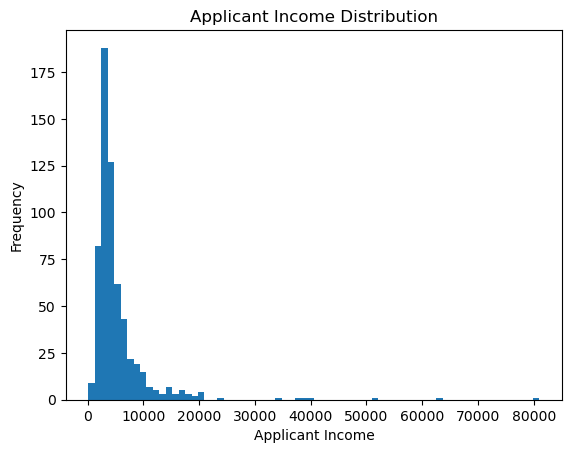

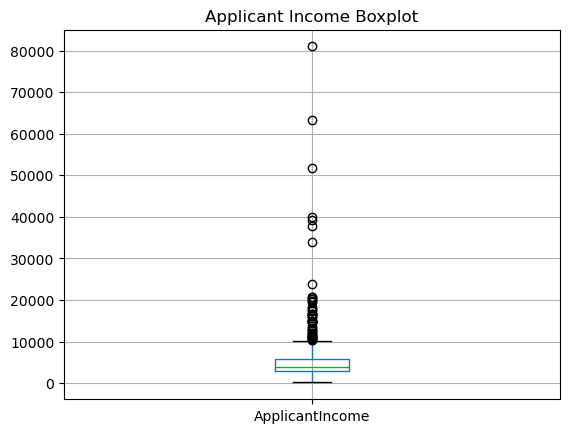

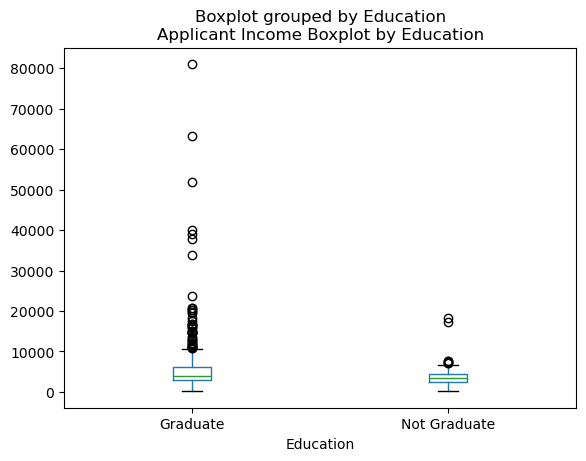

In [133]:

# Visualize Applicant Income
df_train['ApplicantIncome'].hist(bins=70, grid=False)
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

df_train.boxplot(column='ApplicantIncome')
plt.title('Applicant Income Boxplot')
plt.show()

df_train.boxplot(column='ApplicantIncome', by='Education', grid=False)
plt.title('Applicant Income Boxplot by Education')
plt.show()


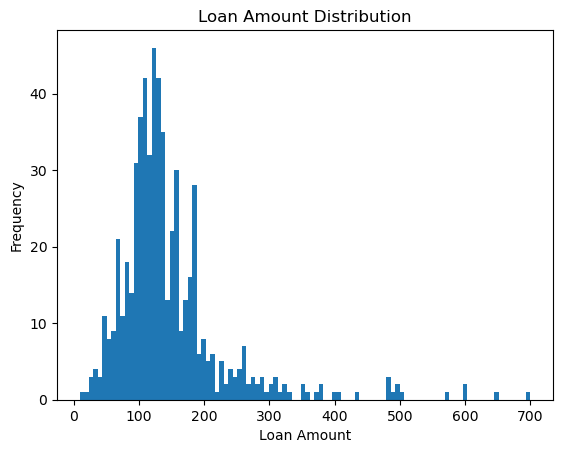

In [134]:

# Visualize Loan Amount
df_train['LoanAmount'].hist(bins=100, grid=False)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

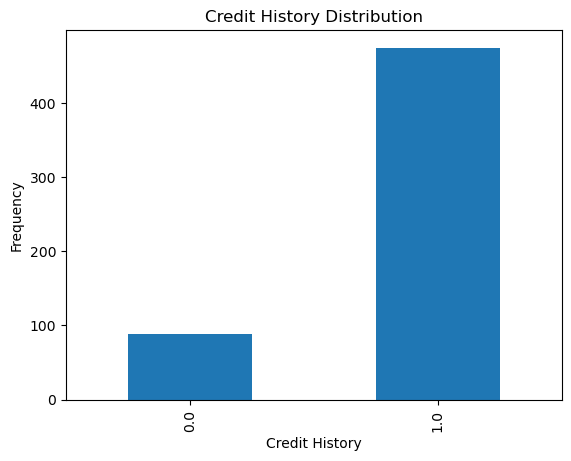

In [135]:
# Visualize Credit History
temp = df_train['Credit_History'].value_counts(ascending=True)
temp.plot(kind='bar')
plt.title('Credit History Distribution')
plt.xlabel('Credit History')
plt.ylabel('Frequency')
plt.show()

In [136]:
# Check for missing values
print(df_train.apply(lambda x: sum(x.isnull()), axis=0))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [137]:
# Fill missing values
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True)
df_train['Self_Employed'].fillna('No', inplace=True)
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)



In [138]:
# Check for missing values after filling
print(df_train.apply(lambda x: sum(x.isnull()), axis=0))



Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [139]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df_train[i] = le.fit_transform(df_train[i])

df_train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [140]:
# Split the dataset into features and target variable
X = df_train.drop(columns='Loan_Status')
y = df_train['Loan_Status']



In [141]:

# Ensure 'Loan_ID' is not included in the features
X = df_train.drop(columns=['Loan_ID', 'Loan_Status'])
y = df_train['Loan_Status']





In [142]:
# Split the dataset into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [143]:
# Build and visualize Decision Tree model
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [144]:

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)


In [145]:
# Fit the model on the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

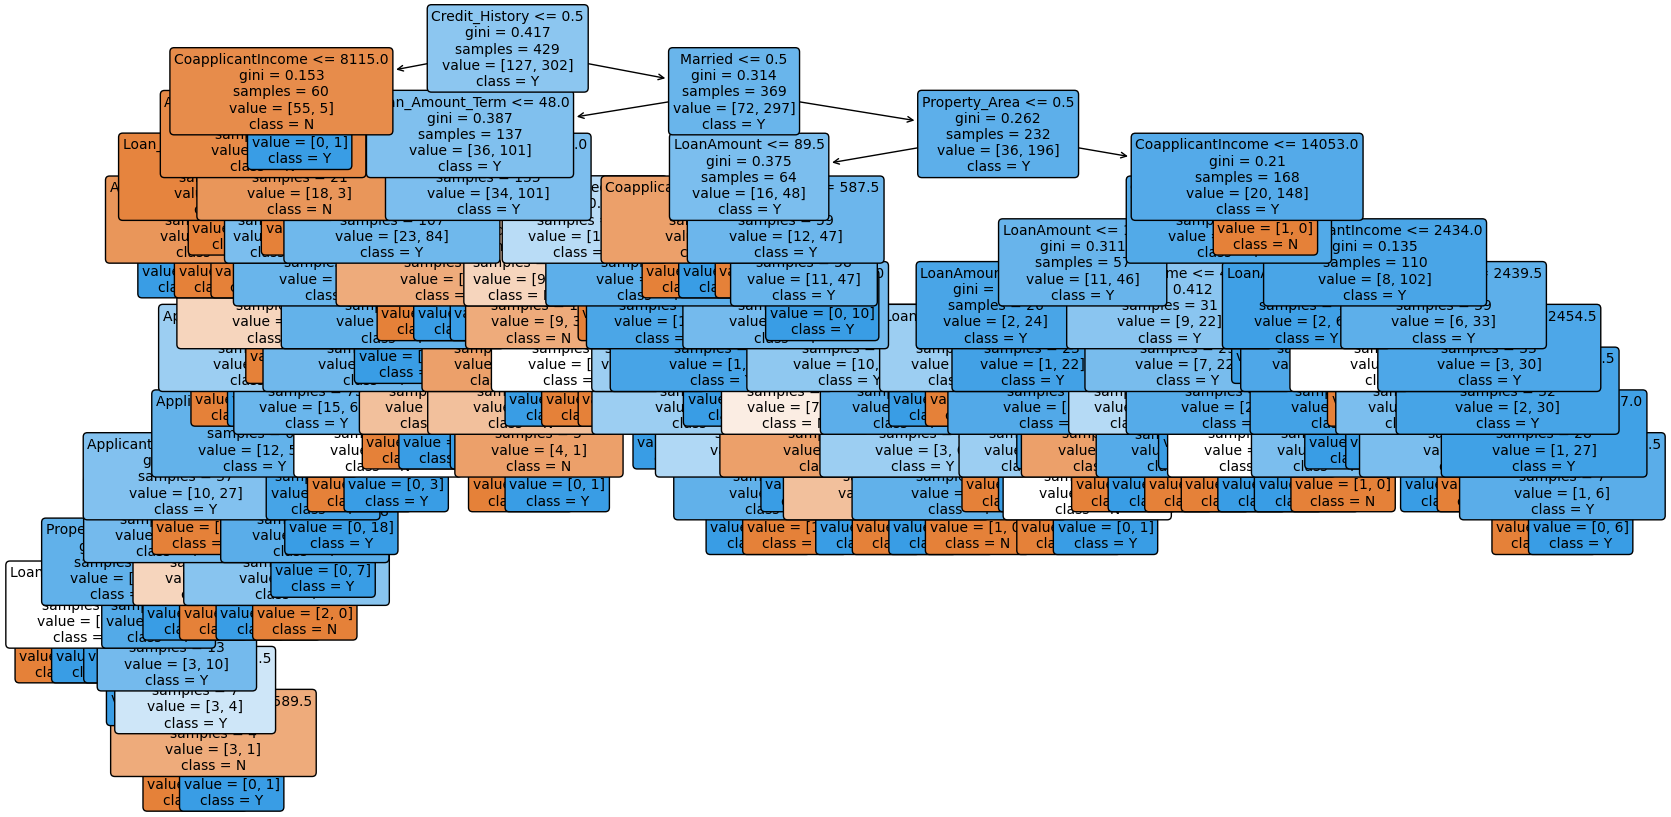

In [146]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['N', 'Y'], filled=True, rounded=True, fontsize=10)
plt.show()

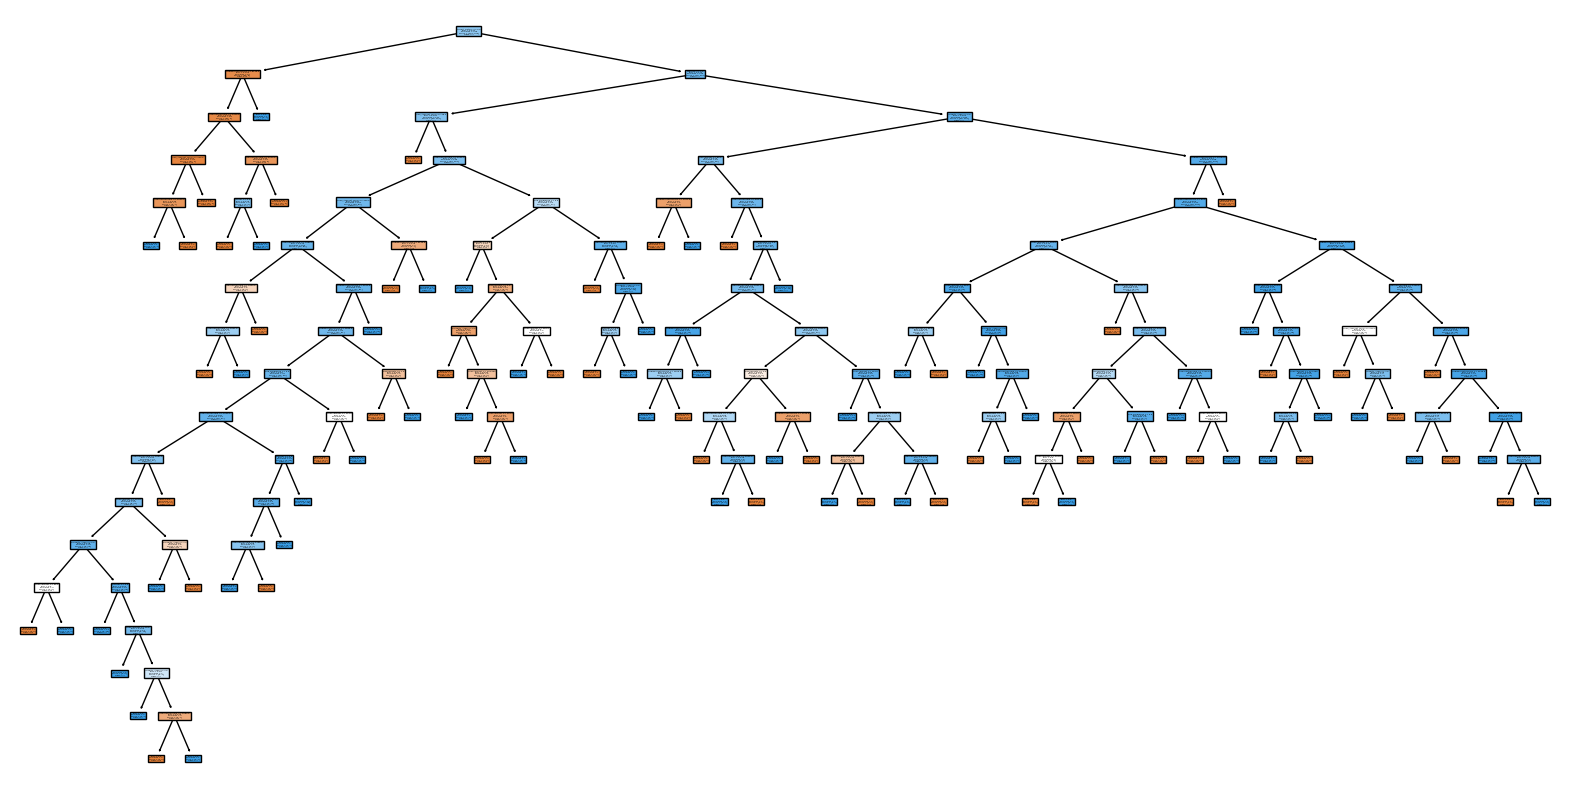

In [147]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['N', 'Y'], filled=True)
plt.show()



In [148]:
# Build Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [149]:
# Evaluate models on validation set
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


In [150]:
# Decision Tree predictions
y_pred_dt = dt_model.predict(X_val)

In [151]:
# Random Forest predictions
y_pred_rf = rf_model.predict(X_val)

In [152]:
# Calculate metrics for Decision Tree
accuracy_dt = accuracy_score(y_val, y_pred_dt)
f1_dt = f1_score(y_val, y_pred_dt)

In [153]:
# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)

In [154]:
# Display the results
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print(f"Decision Tree F1 Score: {f1_dt:.2f}")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest F1 Score: {f1_rf:.2f}")


Decision Tree Accuracy: 0.66
Decision Tree F1 Score: 0.74
Random Forest Accuracy: 0.77
Random Forest F1 Score: 0.84


In [155]:
# Classification reports
print("Decision Tree Classification Report:\n", classification_report(y_val, y_pred_dt))
print("Random Forest Classification Report:\n", classification_report(y_val, y_pred_rf))


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.49      0.50        65
           1       0.73      0.75      0.74       120

    accuracy                           0.66       185
   macro avg       0.62      0.62      0.62       185
weighted avg       0.66      0.66      0.66       185

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.49      0.60        65
           1       0.77      0.93      0.84       120

    accuracy                           0.77       185
   macro avg       0.78      0.71      0.72       185
weighted avg       0.77      0.77      0.76       185



In [156]:
# Confusion matrices
conf_matrix_dt = confusion_matrix(y_val, y_pred_dt)
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)


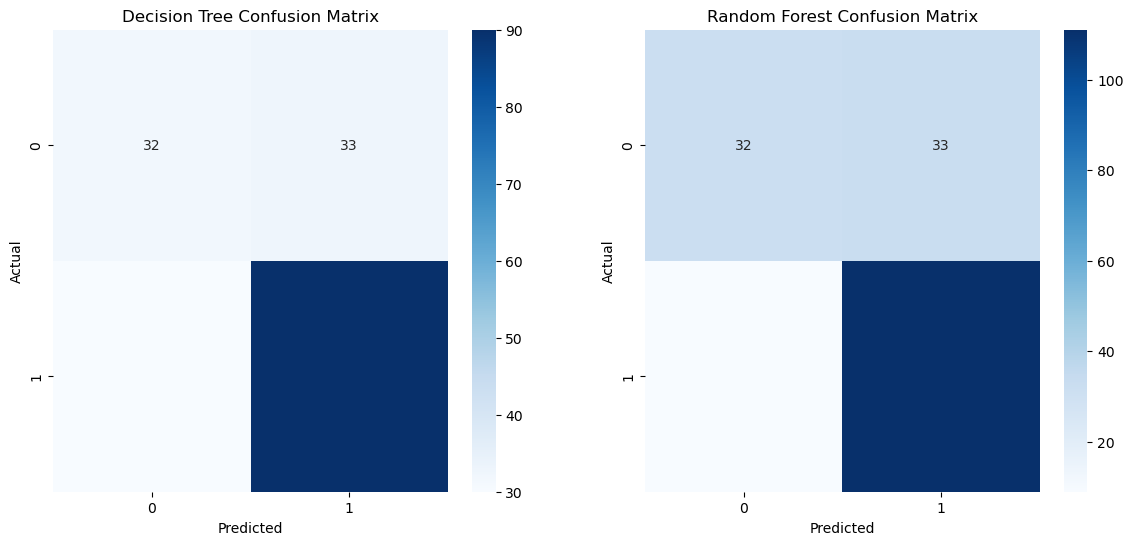

In [157]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Decision Tree Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()

# Preprocess test data

In [158]:
# Fill missing values in test set similar to training set
df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean(), inplace=True)
df_test['Self_Employed'].fillna('No', inplace=True)
df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace=True)
df_test['Married'].fillna(df_test['Married'].mode()[0], inplace=True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mode()[0], inplace=True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0], inplace=True)


In [159]:
# Encode categorical variables in test set
for i in var_mod[:-1]:  # Exclude 'Loan_Status' which is not in test set
    df_test[i] = le.fit_transform(df_test[i])


In [160]:
# Evaluate models on test data
X_test = df_test.drop(columns='Loan_ID')


In [161]:
# Predict using Decision Tree
y_test_pred_dt = dt_model.predict(X_test)


# Predict using Random Forest

In [162]:
# Predict using Random Forest
y_test_pred_rf = rf_model.predict(X_test)

# Convert predictions back to original labels using le_loan_status
y_test_pred_dt = le_loan_status.inverse_transform(y_test_pred_dt)
y_test_pred_rf = le_loan_status.inverse_transform(y_test_pred_rf)

# Prepare the submission dataframe
submission_dt = pd.DataFrame({'Loan_ID': df_test['Loan_ID'], 'Loan_Status': y_test_pred_dt})
submission_rf = pd.DataFrame({'Loan_ID': df_test['Loan_ID'], 'Loan_Status': y_test_pred_rf})

# Save the submission files
submission_dt.to_csv('submission_dt.csv', index=False)
submission_rf.to_csv('submission_rf.csv', index=False)

# Display the first few rows of the submission files
submission_dt.head(), submission_rf.head()


(    Loan_ID  Loan_Status
 0  LP001015            1
 1  LP001022            1
 2  LP001031            1
 3  LP001035            0
 4  LP001051            0,
     Loan_ID  Loan_Status
 0  LP001015            1
 1  LP001022            1
 2  LP001031            1
 3  LP001035            1
 4  LP001051            0)